<h2>Equações de Laplace e Poisson</h2>

<p style="text-align: justify; text-indent:4em"> A Equação de Laplace é uma equação diferencial parcial extremamente empregada na modelagem de problemas de eletromagnetismo, astronomia, mecânica dos fluídos etc. Chamamos de laplaciano o seguinte operador diferencial de segunda ordem: </p>

\begin{equation}
    \nabla^2 = \nabla . \nabla
\end{equation}

<p style="text-align: justify; text-indent:4em"> Assim, temos a seguir a <b>Equação de Laplace</b>, quando o laplaciano é igual a 0: </p>

\begin{equation}
    \nabla^2 u = 0
\end{equation}

<p style="text-align: justify; text-indent:4em"> Por sua vez, temos a <b>Equação de Poisson</b> (a seguir), quando o laplaciano é diferente de 0: </p>

\begin{equation}
    \nabla^2 u = f
\end{equation}


<h3>Problema Proposto</h3>
<p style="text-align: justify; text-indent:4em"> Tem-se uma superfície retangular com 10cm de comprimento (M) e 8cm de altura (N), como pode ser visto na imagem abaixo. Seus "contornos" são submetidos a potenciais diferentes, ou seja, temos quatro condições de contorno. Desse modo, deseja-se encontrar os potenciais internos da superfície, uma vez que os potenciais nas fronteiras já são conhecidos.</p> 

<img src="static/Superficie.png">



<p style="text-align: justify; text-indent:4em"> Em seguida, podemos discretizar essa imagem de acordo com uma variação (delta), que chamamos de h, para encontrarmos uma equação que descreva o potencial interno na placa de acordo com a posição e possa ser resolvida iterativamente. Essa discretização é mostrada na imagem que segue.</p>

<img src="static/SuperficieDiscretizada.png">


<p style="text-align: justify; text-indent:4em"> Podemos então implementar essa situação, como segue abaixo. As variáveis x e y representam os pontos máximos nos eixos das abicissas e das ordenadas. A escala representa quanto o os valores estão "exagerados". Ou seja, se X = 200 e escala = 10, logo o x_max é 20, 20cm por exemplo. Analogamente, sendo h = 1, temos que na prática a variação entre os pontos discretos é 0,1. Assim, podemos trabalhar sempre com valores inteiros e variar a escala para englobarmos todas as situações. </p>

<p style="text-align: justify; text-indent:4em">Podemos considerar, nesse exemplo, que as concidições de contorno são: </p>
<ul>
    <li> Contorno esquerda: 100 V </li>
    <li> Contorno superior: 0 V </li>
    <li> Contorno direita: 0 V </li>
    <li> Contorno superior: 0 V </li>
</ul>

In [16]:
""" Setup incial. Configuracoes que definem o problema """
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step/delta
h = 1

x = 10
y = 8 

# Ou seja, se x = 100, logo o x_max = 100/10 = 10cm. Se h = 1cm, na pratica h se comporta como 0,1cm
escala = 1

# Dimensoes
dim_y = round(x/h) + 1
dim_x = round(y/h) + 1

# Condicoes de contorno 
contorno_cima = 0
contorno_baixo = 0
contorno_direita = 100
contorno_esquerda = 100 

# "Chute" inicial dos valores desconhecidos 
chute_inicial = 0

# Funcoes de apoio 
def escrever_tabela_arquivo(nome, linhas):
    arquivo = open(nome, "w")
    arquivo.write(tabulate(linhas,tablefmt='grid'))
    arquivo.close()
    

if dim_y > dim_x: 
    dim = dim_y
else:
    dim = dim_x

# Seta um grid 2-d (duas matrizes) que representam em conjunto as coordenadas i(X) j(Y) dos pontos da placa
X, Y = np.meshgrid(np.arange(0, dim), np.arange(0, dim))

# Inicializa uma matriz para representar a placa 
placa = np.empty((dim, dim))
        
# Preenche a matriz que representa a placa com o valor do chute inicial
placa.fill(chute_inicial)

# Seta na matriz representativa as condicoes de contorno 
placa[(dim_x-1):dim_x,:dim_y] = contorno_cima
placa[:1,:dim_y] = contorno_baixo
placa[:dim_x,:1] = contorno_esquerda
placa[:dim_x,(dim_y-1):dim_y] = contorno_direita 
escrever_tabela_arquivo("distribuicao_potencial_inicial.txt", placa)
print("Placa inicialmente - condicoes de contorno: \n\n", placa, "\n \n **Salvo em arquivo .txt \n")



Placa inicialmente - condicoes de contorno: 

 [[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]] 
 
 **Salvo em arquivo .txt 



<h3> -> Laplace</h3>
<p style="text-align: justify; text-indent:4em">
Se essa superfície/placa (P) possuir a seguinte Equação de Laplace:</p>
<br>
\begin{equation}
    \nabla^2 u = 0
\end{equation}

\begin{equation}
    \frac {\partial^2 P}{\partial^2 x}\ + \frac {\partial^2 P}{\partial^2 y}\ = 0 
\end{equation}

<p style="text-align: justify; text-indent:4em">Podemos, através da discretização e da Equação de Laplace, encontrar que: </p>

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{\triangle ^2 x}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{\triangle ^2 y}\ = 0 
\end{equation}

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{h}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{h}\ = 0 
\end{equation}

\begin{equation}
  P_{i,j} = \frac {P_{ i+1 , j} + P_{i-1 , j} + P_{ i , j+1} + P_{i , j-1} }{4}
\end{equation}

<p style="text-align: justify; text-indent:4em">Assim, podemos implementar uma solução iterativa que, a partir de um chute inicial dos valores discretizados desconhecidos, convirja para uma solução próxima ao real. De modo que quanto menor o delta/h, maior a precisão. Nesse processo, estabelecemos um número máximo de iterações, bem como um valor de diferenca_minima/diferença mínima. Ou seja, se entre duas iterações, nenhuma diferença entre cada par de pontos (o valor antigo e o atulizado) for maior que a diferença mínima, então inferimos que o processo interativo pode ser encerrado, uma vez que a convergência se tornou muito pequena ou nula.</p>


In [17]:
# Condicoes de parada: Numero maximo de iteracoes e Erro minimo
max_interacoes = 300
diferenca_minima = 0.005

print("Calculando a distribuição do potencial através de Laplace...")


# A ser encontrada com a equacao de Laplace
placaL = np.copy(placa)


#  Aplicando a equacaoo de Laplace
diferenca = True
for rodada in range(max_interacoes):
    placa_bkp = np.copy(placaL)
    diferenca = False 
    for i in range(1, (dim_x-1), h):
        for j in range(1, (dim_y-1), h):
            placaL[i, j] = 0.25 * (placaL[i+1][j] + placaL[i-1][j] + placaL[i][j+1] + placaL[i][j-1])
            if abs(placaL[i, j] - placa_bkp[i, j]) > diferenca_minima:
                diferenca = True

    if diferenca == False:
        break

        
print("\n Cálculo concluído em ", rodada, " iterações. Resultado salvo em arquio txt")
escrever_tabela_arquivo("distribuicao_potencial_calculado_Laplace.txt", placaL)

Calculando a distribuição do potencial através de Laplace...

 Cálculo concluído em  58  iterações. Resultado salvo em arquio txt


<h4>Resultados Gráficos do cálculo com a Eq. de Laplace</h4>

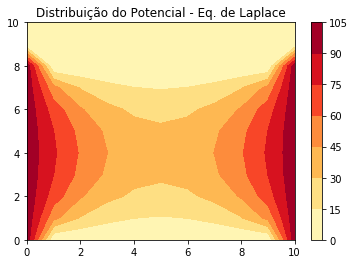

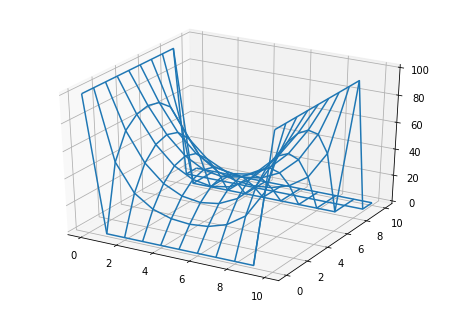

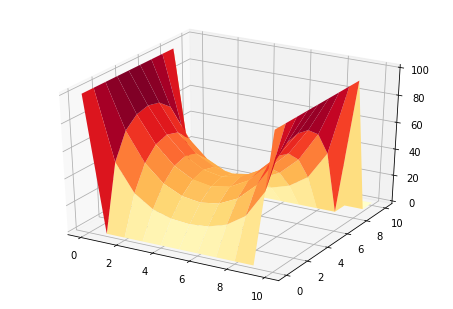

In [18]:
# Mapa de Cor - Escala de amarelo a vermelho sequencialmente
cm = plt.cm.YlOrRd

X = X / escala
Y = Y  / escala

plt.title("Distribuição do Potencial - Eq. de Laplace")
plt.contourf(X,Y, placaL, cmap=plt.cm.YlOrRd)
plt.colorbar()

fig = plt.figure()
ax2 = Axes3D(fig)
if dim_y * dim_x > 1000:
    ax2.plot_wireframe(X, Y, placaL, rstride=5, cstride=5)
else: 
    ax2.plot_wireframe(X, Y, placaL, rstride=1, cstride=1)

fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(X, Y, placaL, cmap=plt.cm.YlOrRd)


plt.show()

<h3> -> Poisson</h3>
<p style="text-align: justify; text-indent:4em">
Podemos realizar esse mesmo processo para o caso da superfície/placa (P) possuir a seguinte Equação de Poisson:</p>
<br>
\begin{equation}
    \nabla^2 u = x + y
\end{equation}

\begin{equation}
    \frac {\partial^2 P}{\partial^2 x}\ + \frac {\partial^2 P}{\partial^2 y}\ = x + y
\end{equation}

<p style="text-align: justify; text-indent:4em">Com isso, através da discretização e da Equação de Poisson, encontramos que: </p>

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{\triangle ^2 x}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{\triangle ^2 y}\ = x + y
\end{equation}

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{h}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{h}\ = x + y
\end{equation}

\begin{equation}
  P_{i,j} = \frac {P_{ i+1 , j} + P_{i-1 , j} + P_{ i , j+1} + P_{i , j-1} - \frac {(x + y)}{h} }{4}
\end{equation}

<p style="text-align: justify; text-indent:4em">Desse modo, analogamente ao que foi feito anteriormente para o caso com a Equação de Laplace, podemos calcular o valor dos pontos com potencial desconhecido de maneira interativa</p>

In [19]:
# Condicoes de parada: Numero maximo de iteracoes e Erro minimo
max_interacoes = 300
diferenca_minima = 0.005

print("Calculando a distribuição do potencial através da Eq. de Poisson ...")

# A ser encontrada com a equacao de Poisson
placaP = np.copy(placa)

#  Aplicando a equacao de Poison
diferenca = True
for rodada in range(max_interacoes):
    placa_bkp = np.copy(placaP)
    diferenca = False 
    for i in range(1, (dim_x-1), h):
        for j in range(1, (dim_y-1), h):
            placaP[i, j] = 0.25 * ( 
                (placaP[i+1][j] + placaP[i-1][j] + placaP[i][j+1] + placaP[i][j-1]) - 
                ((i*h + j*h) * math.pow(h,2))
                )
            if abs(placaP[i, j] - placa_bkp[i, j]) > diferenca_minima:
                diferenca = True

    if diferenca == False:
        break
        
print("\n Cálculo concluído em ", rodada, " iterações. Resultado salvo em arquio txt")
escrever_tabela_arquivo("distribuicao_potencial_calculado_Poisson.txt", placaP)


Calculando a distribuição do potencial através da Eq. de Poisson ...

 Cálculo concluído em  35  iterações. Resultado salvo em arquio txt


<h4>Resultados Gráficos do cálculo com a Eq. de Poisson</h4>

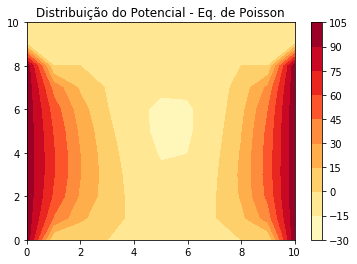

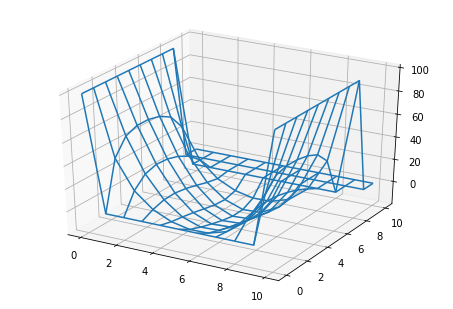

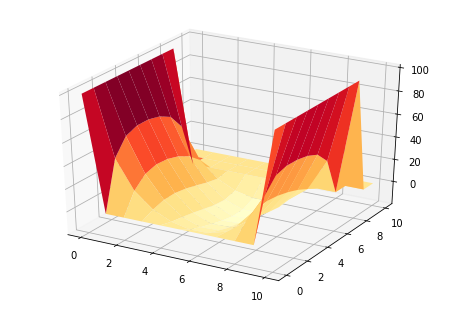

In [20]:
X = X / escala
Y = Y  / escala

plt.title("Distribuição do Potencial - Eq. de Poisson")
plt.contourf(X,Y, placaP, cmap=plt.cm.YlOrRd)
plt.colorbar()

fig = plt.figure()
ax2 = Axes3D(fig)
if dim_y * dim_x > 1000:
    ax2.plot_wireframe(X, Y, placaP, rstride=5, cstride=5)
else: 
    ax2.plot_wireframe(X, Y, placaP, rstride=1, cstride=1)

fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(X, Y, placaP, cmap=plt.cm.YlOrRd)


plt.show()